In [27]:
import pandas as pd

# Corrected file path relative to the notebook
file_path = '../../data/raw/PreAssignmentDataSet_StatorTemp.csv'

# Load the data
df = pd.read_csv(file_path)

In [28]:
df.isna().sum()  # Check for missing values

timestamp_utc                           0
datetime_stamp_pacific                  0
C-02_avg_winding_temp(C)                0
C-04_avg_winding_temp(C)                3
C-05_avg_winding_temp(C)                2
C-06_avg_winding_temp(C)                2
C-07_avg_winding_temp(C)                2
C-02_total_current(A)                   2
C-04_total_current(A)                   3
C-05_total_current(A)                   2
C-06_total_current(A)                   2
C-07_total_current(A)                   2
C-02_avg_cooling_water_flow(gal/min)    2
C-04_avg_cooling_water_flow(gal/min)    3
C-05_avg_cooling_water_flow(gal/min)    2
C-06_avg_cooling_water_flow(gal/min)    2
C-07_avg_cooling_water_flow(gal/min)    2
C-02_avg_cooling_water_temp(C)          2
C-04_avg_cooling_water_temp(C)          3
C-05_avg_cooling_water_temp(C)          2
C-06_avg_cooling_water_temp(C)          2
C-07_avg_cooling_water_temp(C)          2
C-02_avg_cooling_air_out_temp(C)        2
C-04_avg_cooling_air_out_temp(C)  

In [ ]:
# Q1: Count total NA values in the whole dataset
total_na = df.isna().sum().sum()

print(f"Total NA (missing) values: {total_na}")



Total NA (missing) values: 53


In [32]:
#Q1 # Fill all NA values with 0
df.fillna(0, inplace=True)

In [18]:
df.isnull().sum()  # Check for missing values

timestamp_utc                           0
datetime_stamp_pacific                  0
C-02_avg_winding_temp(C)                0
C-04_avg_winding_temp(C)                0
C-05_avg_winding_temp(C)                0
C-06_avg_winding_temp(C)                0
C-07_avg_winding_temp(C)                0
C-02_total_current(A)                   0
C-04_total_current(A)                   0
C-05_total_current(A)                   0
C-06_total_current(A)                   0
C-07_total_current(A)                   0
C-02_avg_cooling_water_flow(gal/min)    0
C-04_avg_cooling_water_flow(gal/min)    0
C-05_avg_cooling_water_flow(gal/min)    0
C-06_avg_cooling_water_flow(gal/min)    0
C-07_avg_cooling_water_flow(gal/min)    0
C-02_avg_cooling_water_temp(C)          0
C-04_avg_cooling_water_temp(C)          0
C-05_avg_cooling_water_temp(C)          0
C-06_avg_cooling_water_temp(C)          0
C-07_avg_cooling_water_temp(C)          0
C-02_avg_cooling_air_out_temp(C)        0
C-04_avg_cooling_air_out_temp(C)  

In [33]:
# Pivot dataframe to long format for compressor units
# Assuming the columns for compressor units are named like 'C-02_avg_winding_temp(C)', etc.

compressor_units = ['C-02', 'C-04', 'C-05', 'C-06', 'C-07']
long_df = pd.DataFrame()

for unit in compressor_units:
    unit_df = df[['timestamp_utc', 'datetime_stamp_pacific']].copy()
    unit_df['CompressorUnit_Details'] = unit
    unit_df['avg_winding_temp_C'] = df[f'{unit}_avg_winding_temp(C)']
    unit_df['total_current_A'] = df[f'{unit}_total_current(A)']
    unit_df['avg_cooling_water_flow_galpermin'] = df[f'{unit}_avg_cooling_water_flow(gal/min)']
    unit_df['avg_cooling_water_temp_C'] = df[f'{unit}_avg_cooling_water_temp(C)']
    unit_df['avg_cooling_air_out_temp_C'] = df[f'{unit}_avg_cooling_air_out_temp(C)']
    
    long_df = pd.concat([long_df, unit_df], ignore_index=True)

In [34]:
long_df.info()  # Display the structure of the long dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   timestamp_utc                     43800 non-null  object 
 1   datetime_stamp_pacific            43800 non-null  object 
 2   CompressorUnit_Details            43800 non-null  object 
 3   avg_winding_temp_C                43800 non-null  float64
 4   total_current_A                   43800 non-null  float64
 5   avg_cooling_water_flow_galpermin  43800 non-null  float64
 6   avg_cooling_water_temp_C          43800 non-null  float64
 7   avg_cooling_air_out_temp_C        43800 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.7+ MB


In [26]:
long_df.head(5)

,timestamp_utc,datetime_stamp_pacific,CompressorUnit_Details,avg_winding_temp_C,total_current_A,avg_cooling_water_flow_galpermin),avg_cooling_water_temp_C,avg_cooling_air_out_temp_C
0,2018-01-01 08:00:00+00:00,2018-01-01 00:00:00,C-02,71.378429,8160.343625,179.440833,20.320124,30.761616
1,2018-01-01 09:00:00+00:00,2018-01-01 01:00:00,C-02,68.943909,7413.362667,176.793354,20.353998,30.574989
2,2018-01-01 10:00:00+00:00,2018-01-01 02:00:00,C-02,66.339036,6567.083083,175.072479,20.239409,30.214402
3,2018-01-01 11:00:00+00:00,2018-01-01 03:00:00,C-02,66.314878,7924.631875,174.162500,20.133054,29.904310
4,2018-01-01 12:00:00+00:00,2018-01-01 04:00:00,C-02,67.678225,8111.058042,174.318333,20.206669,29.980755


In [ ]:
#Q1B - Create a status column based on total_current_A. [Assuming 'offline' if less than 10A    ]
long_df['status'] = long_df['total_current_A'].apply(lambda x: 'offline' if x < 10 else 'online')



In [37]:
# Save reshaped data
long_df.to_csv('../../data/processed/reshaped_compressor_data.csv', index=False)

In [39]:
long_df[long_df['status'] == 'offline'].head(5)


,timestamp_utc,datetime_stamp_pacific,CompressorUnit_Details,avg_winding_temp_C,total_current_A,avg_cooling_water_flow_galpermin,avg_cooling_water_temp_C,avg_cooling_air_out_temp_C,status
9,2018-01-01T17:00:00Z,1/1/18 9:00,C-02,61.870354,-24.951708,145.251688,9.562194,36.140652,offline
10,2018-01-01T18:00:00Z,1/1/18 10:00,C-02,60.605711,-25.363250,146.277500,9.674984,35.915622,offline
70,2018-01-04T06:00:00Z,1/3/18 22:00,C-02,62.037535,-23.788431,144.365535,10.323425,34.659779,offline
71,2018-01-04T07:00:00Z,1/3/18 23:00,C-02,60.542760,-25.233708,141.198264,10.051401,35.925801,offline
72,2018-01-04T08:00:00Z,1/4/18 0:00,C-02,59.250409,-25.346625,140.823333,9.990096,35.636136,offline


In [47]:
# Q2 How many total hours was Unit C6 offline in 2018?
# Filter for C-06, offline status, and year 2018
c06_offline_2018 = long_df[
    (long_df['CompressorUnit_Details'] == 'C-06') &
    (long_df['status'] == 'offline') &
    (pd.to_datetime(long_df['timestamp_utc']).dt.year == 2018)
                        ]

# Total offline hours = number of rows (1 row per hour)
C6_total_offline_hours= c06_offline_2018.shape[0]

print(f"Unit C-06 was offline for {C6_total_offline_hours} hours in 2018.")

Unit C-06 was offline for 480 hours in 2018.


In [48]:
#3 - How many hours was C6 offline in each month?

C6_total_offline_hours_per_month = c06_offline_2018.groupby(pd.to_datetime(c06_offline_2018['timestamp_utc']).dt.month).size()
print("Total offline hours for C-06 in each month of 2018:")
print(C6_total_offline_hours_per_month)


Total offline hours for C-06 in each month of 2018:
timestamp_utc
1      29
3      56
6       3
7       1
8       9
9     141
10    166
11     16
12     59
dtype: int64


In [ ]:
#4 - What percentage of the time was C6 offline in each month?
C6_total_hours_per_month = pd.to_datetime(c06_offline_2018['timestamp_utc']).dt.month.value_counts().sort_index()

percentage_offline_per_month = (C6_total_offline_hours / total_hours_per_month)

print("Percentage of time C-06 was offline in each month of 2018:")

print(percentage_offline_per_month * 100)  # Convert to percentage  

Percentage of time C-06 was offline in each month of 2018:
timestamp_utc
1     100.0
3     100.0
6     100.0
7     100.0
8     100.0
9     100.0
10    100.0
11    100.0
12    100.0
dtype: float64


In [ ]:
#5A - Which unit ran for the most amount of time in 2018?
# Assumption is that the unit with the most 'online' hours is the one that ran the most.
# Group by unit and count online hours

online_hours_per_unit = long_df[long_df['status'] == 'online'].groupby('CompressorUnit_Details').size() 
print("Online hours per unit in 2018:")
print(online_hours_per_unit)    

# Find the unit with the maximum online hours
max_online_unit = online_hours_per_unit.idxmax()
max_online_hours = online_hours_per_unit.max()

print(f"The unit that ran the most in 2018 is {max_online_unit} with {max_online_hours} hours online.") 

Online hours per unit in 2018:
CompressorUnit_Details
C-02    8441
C-04    8447
C-05    8716
C-06    8280
C-07    8563
dtype: int64
The unit that ran the most in 2018 is C-05 with 8716 hours online.


In [ ]:
#5B - Which unit ran for the most amount of time in 2018?
#assumption is that the unit with the most total current is the one that ran the most.
total_current_per_unit = long_df.groupby('CompressorUnit_Details')['total_current_A'].sum()
print("Total current per unit in 2018:")
print(total_current_per_unit)

#find the unit with the maximum total current
max_current_unit = total_current_per_unit.idxmax()
max_current_value = total_current_per_unit.max()    
print(f"The unit that ran the most in 2018 based on total current is {max_current_unit} with {max_current_value} A.")

Total current per unit in 2018:
CompressorUnit_Details
C-02    8.542301e+07
C-04    7.970411e+07
C-05    8.276564e+07
C-06    7.807902e+07
C-07    8.089645e+07
Name: total_current_A, dtype: float64
The unit that ran the most in 2018 based on total current is C-02 with 85423010.04763108 A.


In [57]:
#6 - Which hour of the day has the most offline time?
# count offline hours and then group by hour
offline_hours_per_hour = long_df[long_df['status'] == 'offline'].groupby(pd.to_datetime(long_df['timestamp_utc']).dt.hour).size()
print("Offline hours per hour of the day:")
print(offline_hours_per_hour)   

#show hour with most offline time
most_offline_hour = offline_hours_per_hour.idxmax()
most_offline_count = offline_hours_per_hour.max()
print(f"The hour with the most offline time is {most_offline_hour} with {most_offline_count} offline hours.")

Offline hours per hour of the day:
timestamp_utc
0      20
1      16
2      13
3      13
4      15
5      27
6      43
7      69
8     109
9     141
10    172
11    159
12    121
13     54
14     31
15     34
16     39
17     41
18     46
19     44
20     42
21     44
22     35
23     25
dtype: int64
The hour with the most offline time is 10 with 172 offline hours.


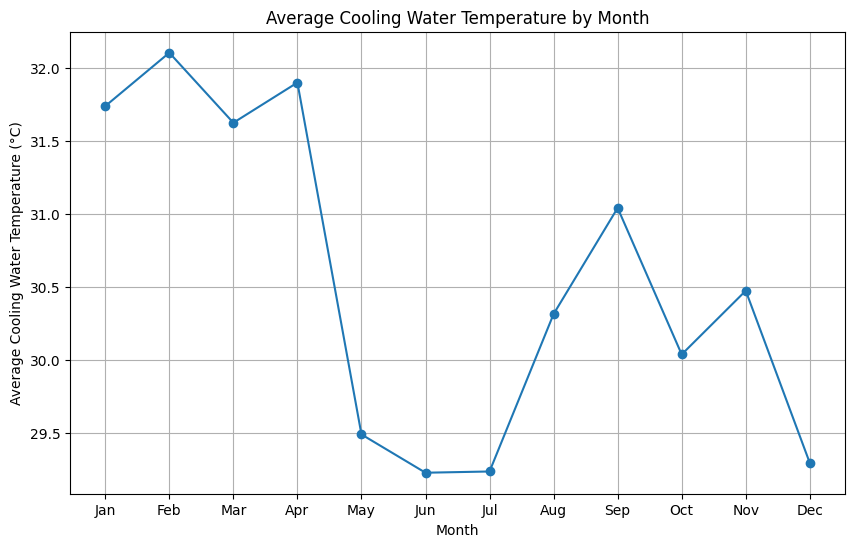

In [59]:
#Q7 - Create a graph showing the average cooling water temperature by month. Are there any other data points that have seasonality fluctuations?

import matplotlib.pyplot as plt
import pandas as pd
# Assuming 'long_df' is your DataFrame and it has a 'timestamp_utc' column
long_df['timestamp_utc'] = pd.to_datetime(long_df['timestamp_utc'])
long_df['month'] = long_df['timestamp_utc'].dt.month
avg_temp_by_month = long_df.groupby('month')['avg_cooling_air_out_temp_C'].mean()
plt.figure(figsize=(10, 6))
plt.plot(avg_temp_by_month.index, avg_temp_by_month.values, marker='o')
plt.title('Average Cooling Water Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Cooling Water Temperature (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()  

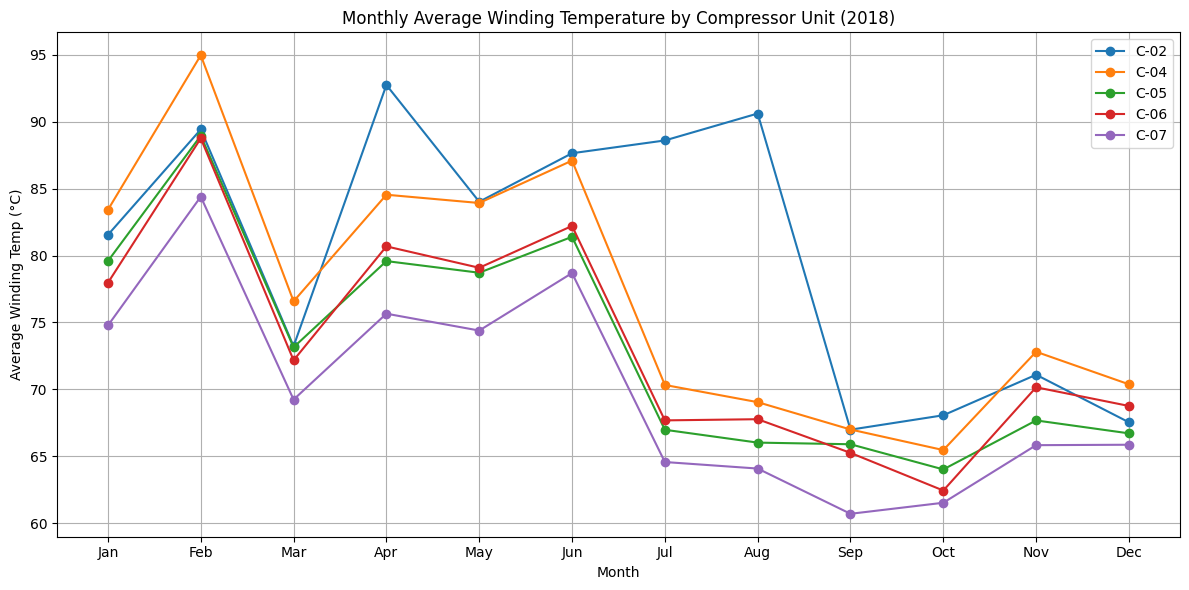

In [ ]:
#Q8 - Are there any apparent differences between the cooling systems of the 5 units? #Show the difference graphically. (I.e. Do any of the units run hotter?)
# assuming 'avg_winding_temp_C' is the column for winding temperature
import matplotlib.pyplot as plt
# Ensure timestamp_utc is in datetime format
long_df['timestamp_utc'] = pd.to_datetime(long_df['timestamp_utc'])
# Create a 'month' column
long_df['month'] = long_df['timestamp_utc'].dt.month
# List of compressor units
compressor_units = ['C-02', 'C-04', 'C-05', 'C-06', 'C-07']
# Plotting
plt.figure(figsize=(12, 6))
for unit in compressor_units:
    unit_data = long_df[long_df['CompressorUnit_Details'] == unit]
    avg_temp = unit_data.groupby('month')['avg_winding_temp_C'].mean().sort_index()
    plt.plot(avg_temp.index, avg_temp.values, marker='o', label=unit)
# Plot formatting
plt.xticks(range(1, 13), 
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
            'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.xlabel('Month')
plt.ylabel('Average Winding Temp (°C)')
plt.title('Monthly Average Winding Temperature by Compressor Unit (2018)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 

In [2]:
#9 - For the month of May, design a dashboard for the cooling system 
# show some graphs and relevant statistics #(max, min, average, etc.) to display how the cooling system performed during the month.
#Assumption: Cooling system performance is measured by following KPIs: 
#avg_cooling_air_out_temp_C, avg_cooling_water_temp_C, and avg_cooling_water_flow_galpermin

import matplotlib.pyplot as plt
import pandas as pd

# Filter data for May 2018
may_data = long_df[
    (long_df['timestamp_utc'].dt.month == 5) &
    (long_df['timestamp_utc'].dt.year == 2018)
]
# Create 'date' column
may_data['date'] = may_data['timestamp_utc'].dt.date
# Set up the dashboard
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Cooling System Performance – May 2018', fontsize=16)

# ---- (1) Line plot: Daily average cooling air out temp ----
daily_avg_air_out = may_data.groupby(['date', 'CompressorUnit_Details'])['avg_cooling_air_out_temp_C'].mean().unstack()
daily_avg_air_out.plot(ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Daily Avg Cooling Air Outlet Temp (°C)')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Temp (°C)')
axs[0, 0].legend(title='Unit')
axs[0, 0].grid(True)

# ---- (2) Box plot: Cooling water temp by unit ----
may_data.boxplot(column='avg_cooling_water_temp_C', by='CompressorUnit_Details', ax=axs[0, 1])
axs[0, 1].set_title('Cooling Water Temp Distribution')
axs[0, 1].set_ylabel('Temp (°C)')
axs[0, 1].set_xlabel('Compressor Unit')
axs[0, 1].grid(True)
axs[0, 1].figure.suptitle('')  # Remove auto suptitle from boxplot

# ---- (3) Box plot: Cooling water flow by unit ----
may_data.boxplot(column='avg_cooling_water_flow_galpermin', by='CompressorUnit_Details', ax=axs[1, 0])
axs[1, 0].set_title('Cooling Water Flow Distribution')
axs[1, 0].set_ylabel('Flow (gal/min)')
axs[1, 0].set_xlabel('Compressor Unit')
axs[1, 0].grid(True)
axs[1, 0].figure.suptitle('')

# ---- (4) Summary stats: Displayed as text ----


NameError: name 'long_df' is not defined

In [1]:
#Q10A- What other type(s) of analysis or business intelligence reporting could be done to help understand the cooling systems and provide insights into their operational performance. 

summary_stats = may_data.groupby('CompressorUnit_Details')[
    ['avg_cooling_air_out_temp_C', 'avg_cooling_water_temp_C', 'avg_cooling_water_flow_galpermin']
].agg(['min', 'mean', 'max']).round(2)

axs[1, 1].axis('off')
table = axs[1, 1].table(cellText=summary_stats.values,
                        colLabels=["Min", "Mean", "Max"] * 3,
                        rowLabels=summary_stats.index,
                        colWidths=[0.1]*9,
                        loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
axs[1, 1].set_title('Summary Stats (Min / Mean / Max)', fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


NameError: name 'may_data' is not defined

In [ ]:
#Q10B What software tools and methods would you use?

# Other types of analysis could include:
# 1. Time Series Analysis: Analyzing trends and seasonality in cooling system performance
# 2. Anomaly Detection: Identifying unusual patterns in cooling system data that may indicate
#    potential issues or inefficiencies.
# 3. Predictive Maintenance: Using historical data to predict when maintenance is needed to prevent
#    failures or inefficiencies.    